In [1]:
import pandas as pd

In [2]:

def processed_data (mecanismo, rate):

    data = pd.read_csv(mecanismo+".csv")

    data = data.sort_values(["Model", "Missing Rate (%)"])

    data = data.reset_index()

    data = data.drop(columns=["index"])

    data = data[data["Missing Rate (%)"]==rate]

    # Create a list with values from 0 to 4 repeated
    list = [i for i in range(5)]

    my_list = []

    for i in range( int(len(data)/5) ):
        for j in list:
            my_list.append(j)

    data["Repetição"] = my_list

    data_teste = pd.pivot_table(data, values=['Teste'], index=["Dataset", "Missing Rate (%)", "Repetição"], columns=['Model'])

    data = data_teste.reset_index(0)

    #solucionando nome colunas
    data.columns = [ ''.join(x) for x in data.columns ]

    data = data.reset_index()

    data.columns = ["Missing Rate", "Repetição", "Dataset", "knn","lpr0","lpr1","lpr2","lpr3","mean","mice","pmivae","saei"]

    data = data.drop(columns=["Missing Rate","Repetição","Dataset"])

    data = data[["lpr0", "lpr1", "lpr2", "lpr3"]]

    # fazendo o complemento para o teste estatístico

    data_processed = data.max().max() + data.min().min() - data

    data_processed.to_csv(mecanismo+"_"+str(rate)+"_processed_todoslpr.csv", index=False)

    print(data_processed)

In [3]:
ls

MAR-CORRELATED/     MAR-MEDIAN.csv  MNAR-MBOUV-RANDOMNESS/     select.ipynb
MAR-CORRELATED.csv  MNAR-MBOUV/     MNAR-MBOUV-RANDOMNESS.csv  todos/
MAR-MEDIAN/         MNAR-MBOUV.csv  select_enter_lpr.ipynb     todos.csv


In [4]:
data = pd.read_csv("todos.csv")

data

,Model,Dataset,Missing Rate (%),Métrica,Teste,Mecanismo
0,mean,sylva_prior,10,MAE,0.095145,MAR-MEDIAN
1,mean,sylva_prior,10,MAE,0.084651,MAR-MEDIAN
2,mean,sylva_prior,10,MAE,0.088315,MAR-MEDIAN
3,mean,sylva_prior,10,MAE,0.090731,MAR-MEDIAN
4,mean,sylva_prior,10,MAE,0.074548,MAR-MEDIAN
...,...,...,...,...,...,...
7195,lpr3,thoracic_surgey,60,MAE,0.178261,MNAR-MBOUV-RANDOMNESS
7196,lpr3,thoracic_surgey,60,MAE,0.165416,MNAR-MBOUV-RANDOMNESS
7197,lpr3,thoracic_surgey,60,MAE,0.159011,MNAR-MBOUV-RANDOMNESS
7198,lpr3,thoracic_surgey,60,MAE,0.168404,MNAR-MBOUV-RANDOMNESS


In [30]:
data = pd.read_csv("todos.csv")

# Create a list with values from 0 to 4 repeated
list = [i for i in range(5)]

my_list = []

for i in range( int(len(data)/5) ):
    for j in list:
        my_list.append(j)

data["Repetição"] = my_list

data_teste = pd.pivot_table(data, values=['Teste'], index=["Mecanismo", "Dataset", "Missing Rate (%)", "Repetição", ], columns=['Model'])

data = data_teste.reset_index(0)

#solucionando nome colunas
data.columns = [ ''.join(x) for x in data.columns ]

data

Mecanismo  Testeknn  \
Dataset    Missing Rate (%) Repetição                                    
bc_coimbra 10               0                 MAR-CORRELATED  0.129019   
                            1                 MAR-CORRELATED  0.119910   
                            2                 MAR-CORRELATED  0.249618   
                            3                 MAR-CORRELATED  0.084749   
                            4                 MAR-CORRELATED  0.200910   
...                                                      ...       ...   
wiscosin   60               0          MNAR-MBOUV-RANDOMNESS  0.113064   
                            1          MNAR-MBOUV-RANDOMNESS  0.105910   
                            2          MNAR-MBOUV-RANDOMNESS  0.111867   
                            3          MNAR-MBOUV-RANDOMNESS  0.095886   
                            4          MNAR-MBOUV-RANDOMNESS  0.106695   

                                       Testelpr0  Testelpr1  Testelpr2  \
Dataset    Missing Rate (%) Repetição                                    
bc_coimbra 10               0           0.135965   0.137268   0.142833   
                            1           0.146770   0.140124   0.152758   
                            2           0.269930   0.285282   0.289122   
                            3           0.112128   0.109669   0.126839   
                            4           0.240769   0.240873   0.241845   
...                                          ...        ...        ...   
wiscosin   60               0           0.122953   0.123102   0.122326   
                            1           0.119730   0.116453   0.117095   
                            2           0.126651   0.124964   0.126231   
                            3           0.108262   0.108475   0.110035   
                            4           0.109942   0.112957   0.110922   

                                       Testelpr3  Testemean  Testemice  \
Dataset    Missing Rate (%) Repetição                                    
bc_coimbra 10               0           0.134720   0.183439   0.145508   
                            1           0.140088   0.218947   0.172214   
                            2           0.285499   0.275906   0.311658   
                            3           0.112653   0.106660   0.081713   
                            4           0.240810   0.219823   0.220482   
...                                          ...        ...        ...   
wiscosin   60               0           0.119135   0.160961   0.108997   
                            1           0.117327   0.159768   0.110679   
                            2           0.125605   0.164514   0.114222   
                            3           0.109031   0.149492   0.098048   
                            4           0.110107   0.149763   0.105933   

                                       Testepmivae  Testesaei  
Dataset    Missing Rate (%) Repetição                          
bc_coimbra 10               0             0.233525   0.133545  
                            1             0.247797   0.225019  
                            2             0.271136   0.326975  
                            3             0.150283   0.088466  
                            4             0.243498   0.181726  
...                                            ...        ...  
wiscosin   60               0             0.160031   0.109323  
                            1             0.159701   0.098915  
                            2             0.165082   0.094315  
                            3             0.151192   0.090601  
                            4             0.148158   0.107407  

[800 rows x 10 columns]

In [31]:
data. columns

Index(['Mecanismo', 'Testeknn', 'Testelpr0', 'Testelpr1', 'Testelpr2',
       'Testelpr3', 'Testemean', 'Testemice', 'Testepmivae', 'Testesaei'],
      dtype='object')

In [32]:

data = data.reset_index()

data.columns = ["Dataset", "Missing Rate", "Repetição", "Mecanismo", "knn","lpr0","lpr1","lpr2","lpr3","mean","mice","pmivae","saei"]

data = data.drop(columns=["Repetição","Dataset"])

data

,Missing Rate,Mecanismo,knn,lpr0,lpr1,lpr2,lpr3,mean,mice,pmivae,saei
0,10,MAR-CORRELATED,0.129019,0.135965,0.137268,0.142833,0.134720,0.183439,0.145508,0.233525,0.133545
1,10,MAR-CORRELATED,0.119910,0.146770,0.140124,0.152758,0.140088,0.218947,0.172214,0.247797,0.225019
2,10,MAR-CORRELATED,0.249618,0.269930,0.285282,0.289122,0.285499,0.275906,0.311658,0.271136,0.326975
3,10,MAR-CORRELATED,0.084749,0.112128,0.109669,0.126839,0.112653,0.106660,0.081713,0.150283,0.088466
4,10,MAR-CORRELATED,0.200910,0.240769,0.240873,0.241845,0.240810,0.219823,0.220482,0.243498,0.181726
...,...,...,...,...,...,...,...,...,...,...,...
795,60,MNAR-MBOUV-RANDOMNESS,0.113064,0.122953,0.123102,0.122326,0.119135,0.160961,0.108997,0.160031,0.109323
796,60,MNAR-MBOUV-RANDOMNESS,0.105910,0.119730,0.116453,0.117095,0.117327,0.159768,0.110679,0.159701,0.098915
797,60,MNAR-MBOUV-RANDOMNESS,0.111867,0.126651,0.124964,0.126231,0.125605,0.164514,0.114222,0.165082,0.094315
798,60,MNAR-MBOUV-RANDOMNESS,0.095886,0.108262,0.108475,0.110035,0.109031,0.149492,0.098048,0.151192,0.090601


In [35]:
data = data[["lpr0", "lpr1", "lpr2", "lpr3"]]

data

,lpr0,lpr1,lpr2,lpr3
0,0.135965,0.137268,0.142833,0.134720
1,0.146770,0.140124,0.152758,0.140088
2,0.269930,0.285282,0.289122,0.285499
3,0.112128,0.109669,0.126839,0.112653
4,0.240769,0.240873,0.241845,0.240810
...,...,...,...,...
795,0.122953,0.123102,0.122326,0.119135
796,0.119730,0.116453,0.117095,0.117327
797,0.126651,0.124964,0.126231,0.125605
798,0.108262,0.108475,0.110035,0.109031


In [36]:
 # fazendo o complemento para o teste estatístico

data_processed = data.max().max() + data.min().min() - data

data_processed

,lpr0,lpr1,lpr2,lpr3
0,1.415509,1.414206,1.408642,1.416755
1,1.404705,1.411350,1.398716,1.411387
2,1.281545,1.266193,1.262353,1.265975
3,1.439346,1.441805,1.424635,1.438821
4,1.310706,1.310601,1.309629,1.310665
...,...,...,...,...
795,1.428521,1.428372,1.429148,1.432339
796,1.431744,1.435021,1.434380,1.434148
797,1.424823,1.426510,1.425244,1.425869
798,1.443213,1.442999,1.441439,1.442444


In [37]:
data_processed.to_csv("processed_intra_lpr.csv", index=False)

In [28]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
import matplotlib.pyplot as plt

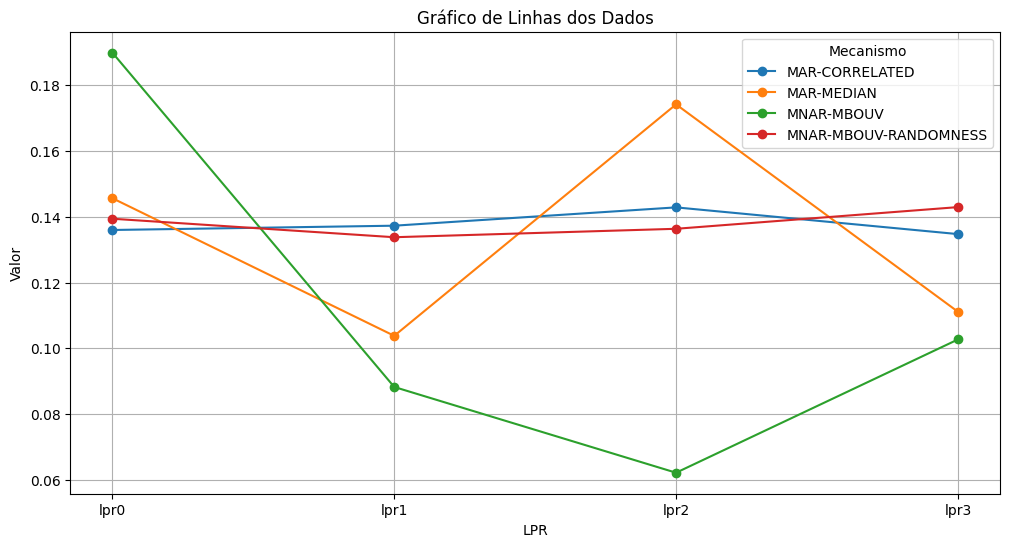

In [30]:
# Carregar os dados
df = data

# Configurar o gráfico
plt.figure(figsize=(12, 6))

# Plotar cada linha de dados
for mecanismo in df['Mecanismo'].unique():
    subset = df[df['Mecanismo'] == mecanismo]
    plt.plot(subset.columns[1:], subset.iloc[0, 1:], marker='o', label=mecanismo)

# Adicionar título e rótulos aos eixos
plt.title('Gráfico de Linhas dos Dados')
plt.xlabel('LPR')
plt.ylabel('Valor')

# Adicionar uma legenda
plt.legend(title='Mecanismo')

# Mostrar o gráfico
plt.grid(True)
plt.show()


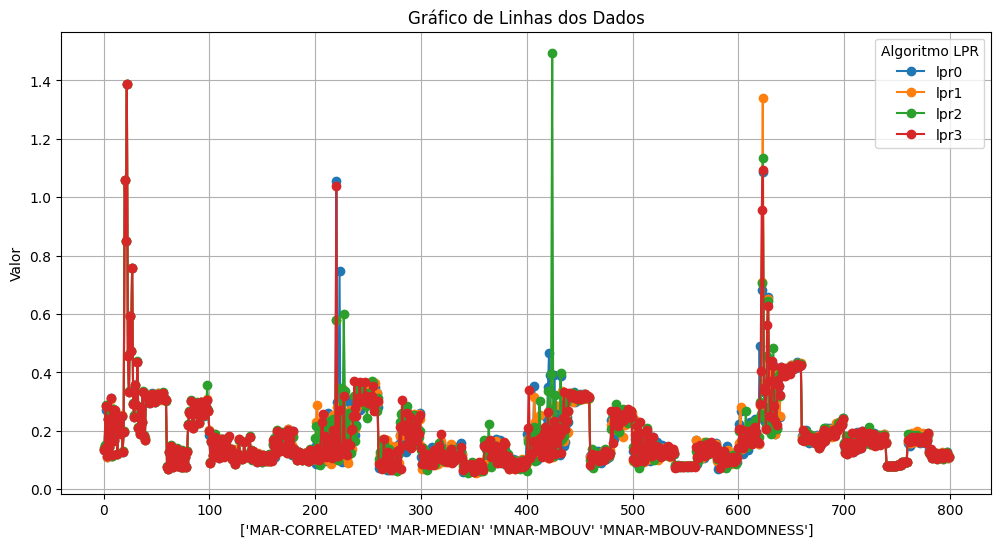

In [40]:
df = data

# Verificar se as colunas correspondem aos algoritmos
algoritmos = ['lpr0', 'lpr1', 'lpr2', 'lpr3']

# Configurar o gráfico
plt.figure(figsize=(12, 6))

# Iterar sobre as colunas de algoritmos LPR0, LPR1, LPR2, LPR3
for algoritmo in algoritmos:
    plt.plot(df[algoritmo], marker='o', label=algoritmo)

subset = df[df['Mecanismo'] == mecanismo]
plt.plot(subset.columns[1:], subset.iloc[0, 1:], marker='o', label=mecanismo)


# Adicionar título e rótulos aos eixos
plt.title('Gráfico de Linhas dos Dados')
plt.xlabel('Mecanismos')
plt.ylabel('Valor')

# Adicionar uma legenda
plt.legend(title='Algoritmo LPR')

# Mostrar o gráfico
plt.grid(True)
plt.show()



In [7]:
processed_data("MAR-MEDIAN", 10)
processed_data("MAR-MEDIAN", 20)
processed_data("MAR-MEDIAN", 40)
processed_data("MAR-MEDIAN", 60)

        lpr0      lpr1      lpr2      lpr3
0   0.965455  1.007252  0.936945  0.999922
1   1.024640  0.880672  0.894919  0.979252
2   0.948449  0.821471  0.989233  1.007705
3   0.968051  0.975710  0.998871  0.969033
4   1.013425  0.961392  0.977038  1.010619
5   0.056896  0.529942  0.532083  0.072679
6   0.812016  0.828691  1.007619  0.998839
7   0.999516  1.011234  1.012291  0.996111
8   0.362605  0.992695  0.921933  0.840414
9   1.011912  0.995826  0.764191  0.988954
10  0.831446  0.814820  0.756580  0.798453
11  0.815345  0.818162  0.807654  0.813674
12  0.838646  0.761934  0.770826  0.743995
13  0.796996  0.802124  0.777487  0.798795
14  0.786865  0.765480  0.811340  0.807513
15  1.039139  1.019113  1.008923  1.023270
16  1.003416  0.994368  0.983243  1.025091
17  1.036419  1.008545  1.029866  1.027397
18  1.022687  0.957922  0.941887  1.040944
19  0.983103  0.938175  0.986670  1.017221
20  0.926605  0.929486  0.882285  0.897639
21  0.941602  0.922263  0.852037  1.041614
22  0.85214

In [79]:
processed_data("MAR-CORRELATED", 10)
processed_data("MAR-CORRELATED", 20)
processed_data("MAR-CORRELATED", 40)
processed_data("MAR-CORRELATED", 60)

        mean       knn      mice    pmivae      saei      lpr2
0   1.229045  1.283465  1.266975  1.178959  1.278939  1.269651
1   1.193537  1.292574  1.240270  1.164687  1.187465  1.259726
2   1.136578  1.162866  1.100826  1.141348  1.085509  1.123362
3   1.305824  1.327734  1.330771  1.262200  1.324018  1.285644
4   1.192661  1.211574  1.192002  1.168986  1.230758  1.170639
5   0.354789  0.348519  0.352548  0.352277  0.354528  0.354918
6   0.563172  0.560959  0.564952  0.560914  0.561495  0.563232
7   0.025025  0.020882  0.016631  0.023878  0.025824  0.023487
8   0.957173  0.947878  0.951986  0.952594  0.955629  0.953289
9   1.081592  1.074802  1.074543  1.078487  1.076698  1.075059
10  1.097188  1.097136  1.105513  1.086664  1.069797  1.097482
11  1.086224  1.072685  1.091413  1.059318  1.088441  1.088336
12  1.096229  1.083876  1.101977  1.118951  1.083144  1.096397
13  1.110005  1.105756  1.118029  1.104720  1.072764  1.102087
14  1.107920  1.101353  1.108814  1.120509  1.098796  1

In [5]:
processed_data("MNAR-MBOUV", 10)
processed_data("MNAR-MBOUV", 20)
processed_data("MNAR-MBOUV", 40)
processed_data("MNAR-MBOUV", 60)

        mean       knn      mice    pmivae      saei      lpr2
0   1.401698  1.413831  1.425142  1.331426  1.381835  1.489562
1   1.422327  1.398370  1.314183  1.323351  1.399428  1.389687
2   1.328174  1.358929  1.354602  1.370779  1.270845  1.380875
3   1.411913  1.422100  1.400219  1.453140  1.415396  1.430364
4   1.444764  1.357134  1.399733  1.379718  1.354202  1.397853
5   1.016801  1.416100  1.442828  1.440093  1.431244  1.214703
6   1.442353  1.340705  1.443883  1.395438  1.444461  1.440869
7   1.436258  1.423585  1.412834  1.430048  1.425354  1.276548
8   1.304180  1.423485  1.140438  1.382142  1.430205  1.158381
9   1.413416  1.415751  1.318882  1.219625  1.269332  0.056984
10  1.224939  1.203456  1.224534  1.239376  1.219421  1.231204
11  1.239799  1.223856  1.243252  1.237736  1.229608  1.233922
12  1.230594  1.220574  1.234212  1.214640  1.226638  1.235686
13  1.244669  1.240562  1.237011  1.245163  1.228857  1.231312
14  1.242919  1.221707  1.240735  1.258088  1.233599  1

In [6]:
processed_data("MNAR-MBOUV-RANDOMNESS", 10)
processed_data("MNAR-MBOUV-RANDOMNESS", 20)
processed_data("MNAR-MBOUV-RANDOMNESS", 40)
processed_data("MNAR-MBOUV-RANDOMNESS", 60)

        mean       knn      mice    pmivae      saei      lpr2
0   0.974932  0.977890  1.008992  0.906025  0.969005  1.037262
1   0.963744  1.001464  0.980145  0.904129  0.958986  0.974906
2   0.988302  0.976567  0.980712  0.942276  1.026632  0.974720
3   0.987728  1.020336  1.020184  0.938715  1.041736  1.008426
4   0.994596  1.015086  1.028237  0.971722  1.028107  1.024404
5   0.871255  0.878334  0.875161  0.875218  0.684468  0.875830
6   0.920076  0.912946  0.902338  0.916091  0.914626  0.916832
7   0.459186  0.478261  0.440880  0.263024  0.337157  0.467628
8   0.102724  0.082209  0.077014  0.082574  0.074111  0.039792
9   0.591200  0.840041  0.621608  0.835024  0.571492  0.828438
10  0.764129  0.760567  0.782281  0.705584  0.833352  0.767891
11  0.781501  0.773088  0.790995  0.716200  0.843499  0.783535
12  0.783776  0.779190  0.785206  0.724320  0.840559  0.775191
13  0.781677  0.767369  0.786167  0.720886  0.852441  0.777060
14  0.782572  0.777058  0.777199  0.723827  0.877266  0

In [11]:
processed_data("todos", 10)

        mean       knn      mice    pmivae      saei      lpr2
0   0.755813  0.768815  0.778270  0.672952  0.747004  0.786626
1   0.741939  0.767183  0.731369  0.687006  0.711595  0.733081
2   0.677350  0.695017  0.703577  0.686696  0.699406  0.720319
3   0.771542  0.802326  0.802631  0.754124  0.804337  0.784098
4   0.743205  0.729603  0.759696  0.725525  0.717867  0.745755
5   0.184634  0.393666  0.407422  0.406471  0.474448  0.347655
6   0.586441  0.440566  0.461964  0.554086  0.586564  0.585409
7   0.160820  0.178924  0.033623  0.274993  0.292861  0.298260
8   0.441401  0.334586  0.338712  0.423415  0.395249  0.371620
9   0.616187  0.633848  0.600567  0.634218  0.576450  0.284440
10  0.573013  0.561335  0.578368  0.561146  0.577925  0.566561
11  0.576433  0.576259  0.582273  0.550597  0.581749  0.581633
12  0.596415  0.579728  0.590107  0.565920  0.594367  0.572796
13  0.576987  0.573739  0.583576  0.572375  0.587545  0.575258
14  0.569771  0.582131  0.592140  0.575321  0.595400  0

In [12]:
ls

MAR-CORRELATED/     MNAR-MBOUV/                select.ipynb
MAR-CORRELATED.csv  MNAR-MBOUV.csv             todos/
MAR-MEDIAN/         MNAR-MBOUV-RANDOMNESS/     todos_10_processed_todos.csv
MAR-MEDIAN.csv      MNAR-MBOUV-RANDOMNESS.csv  todos.csv


In [46]:
data = pd.read_csv("todos.csv")

data = data.sort_values(["Model", "Missing Rate (%)"])

data = data[data["Missing Rate (%)"]==60]

data = data.reset_index()

data = data.drop(columns=["index"])

data

,Model,Dataset,Missing Rate (%),Métrica,Teste,Mecanismo
0,knn,sylva_prior,60,MAE,0.048196,MAR-MEDIAN
1,knn,sylva_prior,60,MAE,0.054708,MAR-MEDIAN
2,knn,sylva_prior,60,MAE,0.052149,MAR-MEDIAN
3,knn,sylva_prior,60,MAE,0.049269,MAR-MEDIAN
4,knn,sylva_prior,60,MAE,0.049899,MAR-MEDIAN
...,...,...,...,...,...,...
1795,saei,thoracic_surgey,60,MAE,0.122481,MNAR-MBOUV-RANDOMNESS
1796,saei,thoracic_surgey,60,MAE,0.148403,MNAR-MBOUV-RANDOMNESS
1797,saei,thoracic_surgey,60,MAE,0.109262,MNAR-MBOUV-RANDOMNESS
1798,saei,thoracic_surgey,60,MAE,0.127485,MNAR-MBOUV-RANDOMNESS


In [47]:
# Create a list with values from 0 to 4 repeated
list = [i for i in range(5)]

my_list = []

for i in range( int(len(data)/5) ):
    for j in list:
        my_list.append(j)

len(my_list)

1800

In [48]:
data["Repetição"] = my_list

data

,Model,Dataset,Missing Rate (%),Métrica,Teste,Mecanismo,Repetição
0,knn,sylva_prior,60,MAE,0.048196,MAR-MEDIAN,0
1,knn,sylva_prior,60,MAE,0.054708,MAR-MEDIAN,1
2,knn,sylva_prior,60,MAE,0.052149,MAR-MEDIAN,2
3,knn,sylva_prior,60,MAE,0.049269,MAR-MEDIAN,3
4,knn,sylva_prior,60,MAE,0.049899,MAR-MEDIAN,4
...,...,...,...,...,...,...,...
1795,saei,thoracic_surgey,60,MAE,0.122481,MNAR-MBOUV-RANDOMNESS,0
1796,saei,thoracic_surgey,60,MAE,0.148403,MNAR-MBOUV-RANDOMNESS,1
1797,saei,thoracic_surgey,60,MAE,0.109262,MNAR-MBOUV-RANDOMNESS,2
1798,saei,thoracic_surgey,60,MAE,0.127485,MNAR-MBOUV-RANDOMNESS,3


In [49]:
data_teste = pd.pivot_table(data, values=['Teste'], index=["Dataset", "Missing Rate (%)", "Mecanismo", "Repetição"], columns=['Model'])

data = data_teste.reset_index(0)

data


Dataset     Teste  \
Model                                                              knn   
Missing Rate (%) Mecanismo             Repetição                         
60               MAR-CORRELATED        0          bc_coimbra  0.183230   
                                       1          bc_coimbra  0.202742   
                                       2          bc_coimbra  0.279404   
                                       3          bc_coimbra  0.116677   
                                       4          bc_coimbra  0.220594   
...                                                      ...       ...   
                 MNAR-MBOUV-RANDOMNESS 0            wiscosin  0.113064   
                                       1            wiscosin  0.105910   
                                       2            wiscosin  0.111867   
                                       3            wiscosin  0.095886   
                                       4            wiscosin  0.106695   

                                                                      \
Model                                                 lpr0      lpr1   
Missing Rate (%) Mecanismo             Repetição                       
60               MAR-CORRELATED        0          0.200197  0.199573   
                                       1          0.191660  0.192935   
                                       2          0.249322  0.255813   
                                       3          0.129037  0.129440   
                                       4          0.197448  0.197947   
...                                                    ...       ...   
                 MNAR-MBOUV-RANDOMNESS 0          0.122953  0.123102   
                                       1          0.119730  0.116453   
                                       2          0.126651  0.124964   
                                       3          0.108262  0.108475   
                                       4          0.109942  0.112957   

                                                                      \
Model                                                 lpr2      lpr3   
Missing Rate (%) Mecanismo             Repetição                       
60               MAR-CORRELATED        0          0.201327  0.198042   
                                       1          0.193060  0.188429   
                                       2          0.249221  0.251169   
                                       3          0.130693  0.127181   
                                       4          0.198464  0.195941   
...                                                    ...       ...   
                 MNAR-MBOUV-RANDOMNESS 0          0.122326  0.119135   
                                       1          0.117095  0.117327   
                                       2          0.126231  0.125605   
                                       3          0.110035  0.109031   
                                       4          0.110922  0.110107   

                                                                      \
Model                                                 mean      mice   
Missing Rate (%) Mecanismo             Repetição                       
60               MAR-CORRELATED        0          0.218880  0.227023   
                                       1          0.232342  0.287327   
                                       2          0.272078  0.301879   
                                       3          0.129657  0.119396   
                                       4          0.205313  0.197461   
...                                                    ...       ...   
                 MNAR-MBOUV-RANDOMNESS 0          0.160961  0.108997   
                                       1          0.159768  0.110679   
                                       2          0.164514  0.114222   
                                       3          0.149492  0.098048   
                                       4          0.149763  0.

In [50]:
#solucionando nome colunas
data.columns = [ ''.join(x) for x in data.columns ]

data = data.reset_index()

data

,Missing Rate (%),Mecanismo,Repetição,Dataset,Testeknn,Testelpr0,Testelpr1,Testelpr2,Testelpr3,Testemean,Testemice,Testepmivae,Testesaei
0,60,MAR-CORRELATED,0,bc_coimbra,0.183230,0.200197,0.199573,0.201327,0.198042,0.218880,0.227023,0.250980,0.115510
1,60,MAR-CORRELATED,1,bc_coimbra,0.202742,0.191660,0.192935,0.193060,0.188429,0.232342,0.287327,0.245527,0.210871
2,60,MAR-CORRELATED,2,bc_coimbra,0.279404,0.249322,0.255813,0.249221,0.251169,0.272078,0.301879,0.261310,0.291524
3,60,MAR-CORRELATED,3,bc_coimbra,0.116677,0.129037,0.129440,0.130693,0.127181,0.129657,0.119396,0.160060,0.110342
4,60,MAR-CORRELATED,4,bc_coimbra,0.220594,0.197448,0.197947,0.198464,0.195941,0.205313,0.197461,0.220684,0.189190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,60,MNAR-MBOUV-RANDOMNESS,0,wiscosin,0.113064,0.122953,0.123102,0.122326,0.119135,0.160961,0.108997,0.160031,0.109323
196,60,MNAR-MBOUV-RANDOMNESS,1,wiscosin,0.105910,0.119730,0.116453,0.117095,0.117327,0.159768,0.110679,0.159701,0.098915
197,60,MNAR-MBOUV-RANDOMNESS,2,wiscosin,0.111867,0.126651,0.124964,0.126231,0.125605,0.164514,0.114222,0.165082,0.094315
198,60,MNAR-MBOUV-RANDOMNESS,3,wiscosin,0.095886,0.108262,0.108475,0.110035,0.109031,0.149492,0.098048,0.151192,0.090601


In [51]:
data.columns = ["Missing Rate", "Mecanismo", "Repetição", "Dataset", "knn","lpr0","lpr1","lpr2","lpr3","mean","mice","pmivae","saei"]

data = data.drop(columns=["Missing Rate","Mecanismo", "Repetição","Dataset","lpr0","lpr1","lpr3"])

data = data[["mean","knn","mice","pmivae","saei","lpr2"]]

data

,mean,knn,mice,pmivae,saei,lpr2
0,0.218880,0.183230,0.227023,0.250980,0.115510,0.201327
1,0.232342,0.202742,0.287327,0.245527,0.210871,0.193060
2,0.272078,0.279404,0.301879,0.261310,0.291524,0.249221
3,0.129657,0.116677,0.119396,0.160060,0.110342,0.130693
4,0.205313,0.220594,0.197461,0.220684,0.189190,0.198464
...,...,...,...,...,...,...
195,0.160961,0.113064,0.108997,0.160031,0.109323,0.122326
196,0.159768,0.105910,0.110679,0.159701,0.098915,0.117095
197,0.164514,0.111867,0.114222,0.165082,0.094315,0.126231
198,0.149492,0.095886,0.098048,0.151192,0.090601,0.110035


In [52]:
# fazendo o complemento para o teste estatístico

data_processed = data.max().max() + data.min().min() - data

print(data_processed)

data_processed.to_csv("todos_processed_60.csv", index=False)

         mean       knn      mice    pmivae      saei      lpr2
0    0.645135  0.680785  0.636992  0.613035  0.748505  0.662688
1    0.631673  0.661273  0.576688  0.618487  0.653143  0.670954
2    0.591937  0.584611  0.562136  0.602705  0.572491  0.614794
3    0.734358  0.747338  0.744619  0.703954  0.753673  0.733322
4    0.658702  0.643421  0.666554  0.643331  0.674825  0.665551
..        ...       ...       ...       ...       ...       ...
195  0.703054  0.750951  0.755018  0.703984  0.754692  0.741689
196  0.704247  0.758105  0.753336  0.704314  0.765100  0.746920
197  0.699501  0.752148  0.749793  0.698933  0.769700  0.737784
198  0.714523  0.768129  0.765967  0.712823  0.773414  0.753980
199  0.714252  0.757320  0.758082  0.715857  0.756608  0.753093

[200 rows x 6 columns]
